In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_csv("DailyTemps.csv",parse_dates=["DATE"],index_col="DATE")

In [5]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

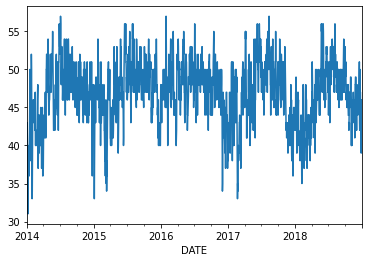

In [6]:
df["AvgTemp"].plot()

In [7]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.AvgTemp)
pval=res[1]
if pval>0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


In [10]:
from pmdarima import auto_arima

In [11]:
auto_model=auto_arima(df["AvgTemp"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.708, Time=3.61 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.26 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.95 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.317, Time=3.22 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.614, Time=3.17 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.188, Time=3.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.081, Time=4.02 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.161, Time=4.26 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.633, Time=4.61 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.109, Time=4.40 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [12]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.659
Date:                Fri, 23 Apr 2021   AIC                           8295.317
Time:                        12:39:34   BIC                           8339.374
Sample:                             0   HQIC                          8311.571
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2806      0.379      3.377      0.001       0.537       2.024
ar.L1          0.9724      0.008    118.924      0.000       0.956       0.988
ma.L1         -0.1261      0.024     -5.283      0.000      -0.173      -0.079
ma.L2         -0.2194      0.024     -9.021      0.000      -0.267      -0.172
ma.L3         -0.2015      0.024     -8.374      0.000      -0.249      -0.154
ma.L4         -0.1352      0.023     -5.906      0.000      -0.180      -0.090
ma.L5         -0.0493      0.024     -2.011      0.044      -0.097      -0.001
sigma2         5.5157      0.173     31.847      0.000       5.176       5.855
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.90
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
X=df["AvgTemp"]

In [14]:
len(X)

1821

In [15]:
train_len=int(0.8*len(X))

In [16]:
train=X[:train_len]
len(train)

1456

In [17]:
#train.head()

In [18]:
test=X[train_len:]
len(test)

365

In [19]:
1456+365

1821

In [20]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1456
Model:                     ARMA(1, 5)   Log Likelihood               -3334.671
Method:                       css-mle   S.D. of innovations              2.389
Date:                Fri, 23 Apr 2021   AIC                           6685.343
Time:                        12:39:45   BIC                           6727.610
Sample:                             0   HQIC                          6701.113
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.860     54.102      0.000      44.844      48.215
ar.L1.AvgTemp     0.9844      0.009    112.837      0.000       0.967       1.002
ma.L1.AvgTemp    -0.1312      0.028     -4.704      0.000      -0.186      -0.077
ma.L2.AvgTemp    -0.2444      0.028     -8.852      0.000      -0.299      -0.190
ma.L3.AvgTemp    -0.2051      0.029     -7.029      0.000      -0.262      -0.148
ma.L4.AvgTemp    -0.1476      0.027     -5.486      0.000      -0.200      -0.095
ma.L5.AvgTemp    -0.0584      0.028     -2.082      0.037      -0.113      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0158           +0.0000j            1.0158            0.0000
MA.1            1.0910           -0.0000j            1.0910           -0.0000
MA.2            0.0718           -1.8558j            1.8572           -0.2438
MA.3            0.0718           +1.8558j            1.8572            0.2438
MA.4           -1.8803           -1.0060j            2.1324           -0.4218
MA.5           -1.8803           +1.0060j            2.1324            0.4218
-----------------------------------------------------------------------------
"""

In [21]:
ARMA(p,q) d=0
ARIMA(p,d,q)


SyntaxError: invalid syntax (<ipython-input-21-887ec76fc911>, line 1)

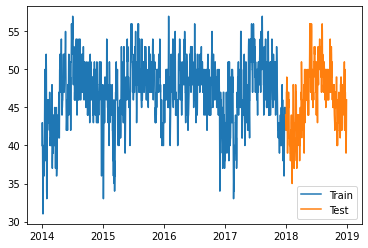

In [23]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [24]:
ypred_train=model_fit.predict()

In [25]:
ypred_train

DATE
2014-01-01    46.529325
2014-01-02    41.196916
2014-01-03    43.977319
2014-01-04    41.710021
2014-01-05    38.275594
                ...    
2017-12-25    44.577266
2017-12-26    41.599460
2017-12-27    43.747998
2017-12-28    44.505476
2017-12-29    42.748241
Length: 1456, dtype: float64

In [26]:
#Predictions on Test dataset

In [27]:
#start->len(train) 

In [28]:
#end->len(train)+len(test)-1
#end->len(X)-1

In [29]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [30]:
ypred_test,test

(1456    42.929234
 1457    42.907451
 1458    43.061214
 1459    43.165983
 1460    43.203594
           ...    
 1816    46.516802
 1817    46.516997
 1818    46.517189
 1819    46.517377
 1820    46.517563
 Length: 365, dtype: float64,
 DATE
 2017-12-30    44.0
 2017-12-31    44.0
 2018-01-01    44.0
 2018-01-02    44.0
 2018-01-03    42.0
               ... 
 2018-12-26    40.0
 2018-12-27    39.0
 2018-12-28    40.0
 2018-12-29    42.0
 2018-12-30    46.0
 Name: AvgTemp, Length: 365, dtype: float64)

In [31]:
date_test=pd.date_range(start='2017-12-30',end="2018-12-29")
date_test

DatetimeIndex(['2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=365, freq='D')

In [32]:
ypred_test.index=date_test

In [33]:
ypred_test

2017-12-30    42.929234
2017-12-31    42.907451
2018-01-01    43.061214
2018-01-02    43.165983
2018-01-03    43.203594
                ...    
2018-12-25    46.516802
2018-12-26    46.516997
2018-12-27    46.517189
2018-12-28    46.517377
2018-12-29    46.517563
Freq: D, Length: 365, dtype: float64

<AxesSubplot:xlabel='DATE'>

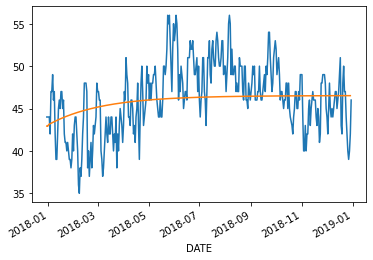

In [34]:
test.plot()
ypred_test.plot()

<AxesSubplot:ylabel='Density'>

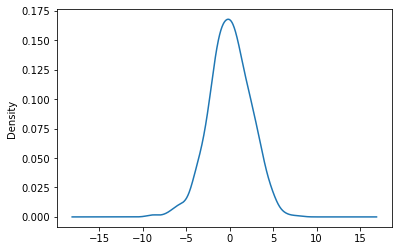

In [35]:
residuals=model_fit.resid
residuals.plot(kind="kde")

In [36]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,ypred_test)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 14.341736378015487
RMSE is : 3.7870485048406084


In [37]:
#predict 30 future values

In [38]:
model=ARIMA(X,order=(1,0,5))
model_fit=model.fit()

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [39]:
X

DATE
2014-01-01    40.0
2014-01-02    43.0
2014-01-03    41.0
2014-01-04    37.0
2014-01-05    31.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 1821, dtype: float64

In [40]:
forecast=model_fit.predict(start=len(X),end=len(X)+29)

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [41]:
forecast

1821    46.418067
1822    46.113788
1823    45.617779
1824    45.249564
1825    45.116994
1826    45.136781
1827    45.156291
1828    45.175528
1829    45.194495
1830    45.213196
1831    45.231636
1832    45.249817
1833    45.267743
1834    45.285418
1835    45.302846
1836    45.320030
1837    45.336972
1838    45.353678
1839    45.370149
1840    45.386390
1841    45.402403
1842    45.418191
1843    45.433759
1844    45.449108
1845    45.464243
1846    45.479165
1847    45.493879
1848    45.508386
1849    45.522690
1850    45.536793
dtype: float64

In [42]:
forecast_date=pd.date_range(start="2019-01-01",end="2019-01-30")
len(forecast_date),len(forecast)

(30, 30)

In [43]:
forecast.index=forecast_date

<AxesSubplot:>

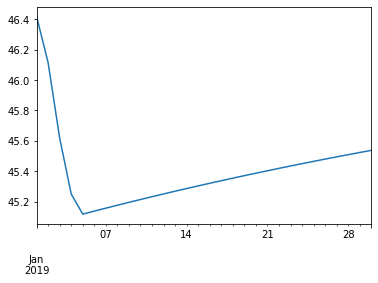

In [44]:
forecast.plot()